There are 292 SRB residues
SRB has 26 atoms
There are 186 STA residues
STA has 59 atoms


C:\Users\dong_\Anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:425: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)
C:\Users\dong_\Anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:425: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)
C:\Users\dong_\Anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:425: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)
C:\Users\dong_\Anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:417: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use

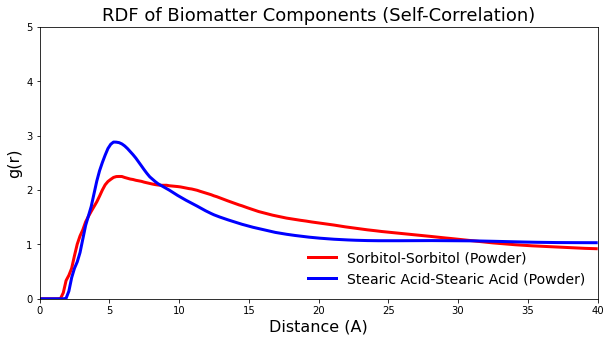

C:\Users\dong_\Anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:417: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
C:\Users\dong_\Anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:417: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)


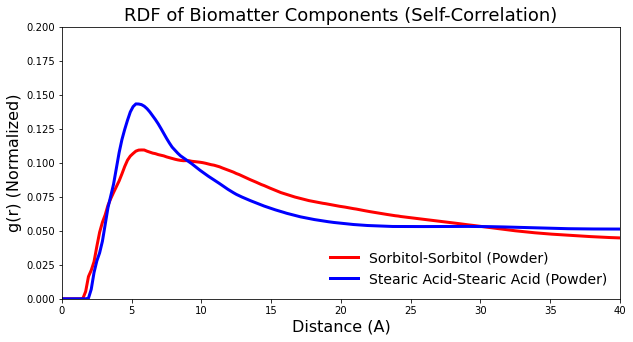

C:\Users\dong_\Anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:417: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
C:\Users\dong_\Anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:425: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


In [1]:
from matplotlib import rcParams
rcParams['font.family'] = 'Arial Narrow'

from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import MDAnalysis as mda
from MDAnalysis.analysis import rdf


u = mda.Universe('../../BSA_b-BSA_b-402x_Cellulose6-292x_SRB-186x_STA_powder/md_resnr.gro', '../../BSA_b-BSA_b-402x_Cellulose6-292x_SRB-186x_STA_powder/traj_whole_nojump_mol_comp.xtc')
srb = u.select_atoms('resname SRB')
sta = u.select_atoms('resname STA')

print('There are {} SRB residues'.format(len(srb.residues)))
print('SRB has {} atoms'.format(len(srb.residues[0].atoms)))

print('There are {} STA residues'.format(len(sta.residues)))
print('STA has {} atoms'.format(len(sta.residues[0].atoms)))

irdf_srb_powder = rdf.InterRDF(srb, srb, exclusion_block=(26, 26), nbins=200, range=(0, 40))
irdf_sta_powder = rdf.InterRDF(sta, sta, exclusion_block=(59, 59), nbins=200, range=(0, 40))

irdf_srb_powder.run()
irdf_sta_powder.run()

irdf_srb_norm_powder = preprocessing.normalize([irdf_srb_powder.rdf]).reshape((len(irdf_srb_powder.rdf),1)).flatten()
irdf_sta_norm_powder = preprocessing.normalize([irdf_sta_powder.rdf]).reshape((len(irdf_sta_powder.rdf),1)).flatten()

plt.figure(figsize = (10, 5))
plt.plot(irdf_srb_powder.bins, irdf_srb_powder.rdf, label = "Sorbitol-Sorbitol (Powder)", color = "red", linewidth = 3)
plt.plot(irdf_srb_powder.bins, irdf_sta_powder.rdf, label = "Stearic Acid-Stearic Acid (Powder)", color = "blue", linewidth = 3)
plt.xlim([0,40])
plt.ylim([0,5])
plt.legend(fontsize = 14, loc = 'lower right', frameon = False)
plt.xlabel('Distance (A)', fontsize = 16)
plt.ylabel('g(r)', fontsize = 16)
plt.title('RDF of Biomatter Components (Self-Correlation)', fontsize = 18)
plt.savefig("rdf_sc_sc_fa_fa_mda_powder.svg")
plt.show()

plt.figure(figsize = (10, 5))
plt.plot(irdf_srb_powder.bins, irdf_srb_norm_powder, label = "Sorbitol-Sorbitol (Powder)", color = "red", linewidth = 3)
plt.plot(irdf_sta_powder.bins, irdf_sta_norm_powder, label = "Stearic Acid-Stearic Acid (Powder)", color = "blue", linewidth = 3)
plt.xlim([0,40])
plt.ylim([0,0.2])
plt.legend(fontsize = 14, loc = 'lower right', frameon = False)
plt.xlabel('Distance (A)', fontsize = 16)
plt.ylabel('g(r) (Normalized)', fontsize = 16)
plt.title('RDF of Biomatter Components (Self-Correlation)', fontsize = 18)
plt.savefig("rdf_sc_sc_fa_fa_mda_normalized_powder.svg")
plt.show()

import pandas as pd
df = pd.DataFrame({"r (A)":irdf_srb_powder.bins,"g(r) SRB":irdf_srb_powder.rdf,"g(r) STA":irdf_sta_powder.rdf,"g(r) (Normalized) SRB":irdf_srb_norm_powder,"g(r) (Normalized) STA":irdf_sta_norm_powder})
df.to_csv("RDF_MDA_sc_sc_fa_fa_powder.csv", index=False)

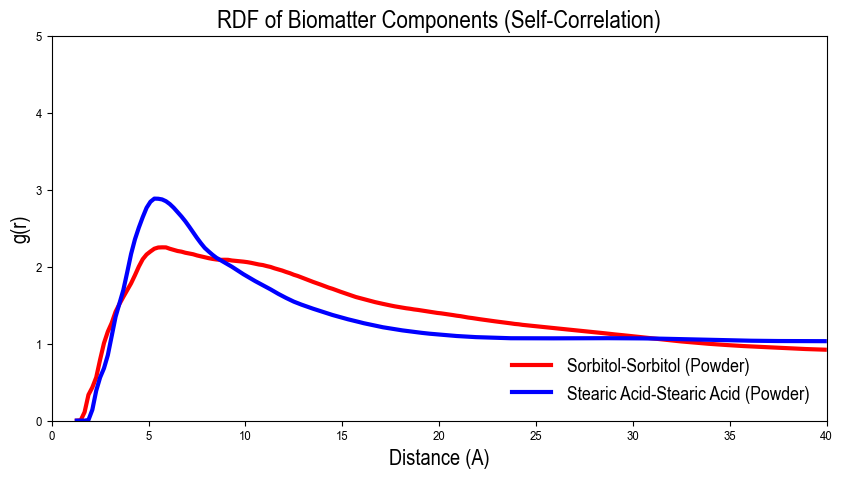

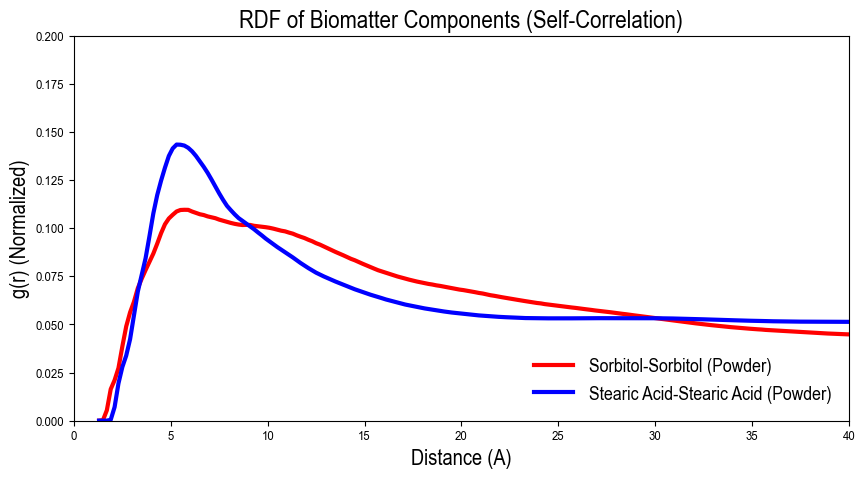

In [8]:
import csv

def read_csv_to_2d_array(file_path):
    data = []
    with open(file_path, newline='') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)  # Skip the header row
        for row in csvreader:
            data.append(row)
    return data

file_path = 'RDF_MDA_sc_sc_fa_fa_powder.csv'
data = read_csv_to_2d_array(file_path)

r_srb_powder = []
r_sta_powder = []
irdf_srb_powder = []
irdf_sta_powder = []
irdf_srb_norm_powder = []
irdf_sta_norm_powder = []

for data_point in data:
    if float(data_point[1]) != 0: #can't log(0)!
        r_srb_powder.append(float(data_point[0]))
        r_sta_powder.append(float(data_point[0]))
        irdf_srb_powder.append(float(data_point[1]))
        irdf_sta_powder.append(float(data_point[2]))
        irdf_srb_norm_powder.append(float(data_point[3]))
        irdf_sta_norm_powder.append(float(data_point[4]))
        
plt.figure(figsize = (10, 5))
plt.plot(r_srb_powder, irdf_srb_powder, label = "Sorbitol-Sorbitol (Powder)", color = "red", linewidth = 3)
plt.plot(r_sta_powder, irdf_sta_powder, label = "Stearic Acid-Stearic Acid (Powder)", color = "blue", linewidth = 3)
plt.xlim([0,40])
plt.ylim([0,5])
plt.legend(fontsize = 14, loc = 'lower right', frameon = False)
plt.xlabel('Distance (A)', fontsize = 16)
plt.ylabel('g(r)', fontsize = 16)
plt.title('RDF of Biomatter Components (Self-Correlation)', fontsize = 18)
plt.savefig("rdf_sc_sc_fa_fa_mda_powder_2.svg")
plt.show()

plt.figure(figsize = (10, 5))
plt.plot(r_srb_powder, irdf_srb_norm_powder, label = "Sorbitol-Sorbitol (Powder)", color = "red", linewidth = 3)
plt.plot(r_sta_powder, irdf_sta_norm_powder, label = "Stearic Acid-Stearic Acid (Powder)", color = "blue", linewidth = 3)
plt.xlim([0,40])
plt.ylim([0,0.2])
plt.legend(fontsize = 14, loc = 'lower right', frameon = False)
plt.xlabel('Distance (A)', fontsize = 16)
plt.ylabel('g(r) (Normalized)', fontsize = 16)
plt.title('RDF of Biomatter Components (Self-Correlation)', fontsize = 18)
plt.savefig("rdf_sc_sc_fa_fa_mda_normalized_powder_2.svg")
plt.show()

There are 292 SRB residues
SRB has 26 atoms
There are 186 STA residues
STA has 59 atoms


C:\Users\dong_\Anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:425: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)
C:\Users\dong_\Anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:425: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)
C:\Users\dong_\Anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:417: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
C:\Users\dong_\Anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:417: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please u

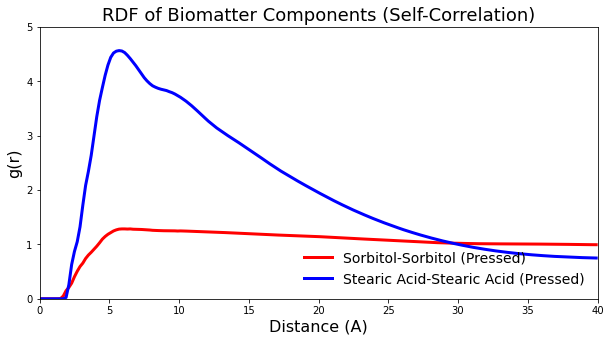

C:\Users\dong_\Anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:417: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
C:\Users\dong_\Anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:417: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)


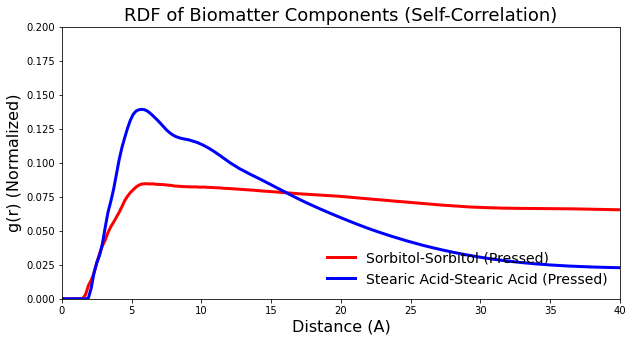

C:\Users\dong_\Anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:417: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
C:\Users\dong_\Anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:425: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


In [3]:
from matplotlib import rcParams
rcParams['font.family'] = 'Arial Narrow'

from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import MDAnalysis as mda
from MDAnalysis.analysis import rdf


u = mda.Universe('../../BSA_b-BSA_b-402x_Cellulose6-292x_SRB-186x_STA_pressed/md_resnr.gro', '../../BSA_b-BSA_b-402x_Cellulose6-292x_SRB-186x_STA_pressed/traj_whole_nojump_mol_comp.xtc')
srb = u.select_atoms('resname SRB')
sta = u.select_atoms('resname STA')

print('There are {} SRB residues'.format(len(srb.residues)))
print('SRB has {} atoms'.format(len(srb.residues[0].atoms)))

print('There are {} STA residues'.format(len(sta.residues)))
print('STA has {} atoms'.format(len(sta.residues[0].atoms)))

irdf_srb_pressed = rdf.InterRDF(srb, srb, exclusion_block=(26, 26), nbins=200, range=(0, 40))
irdf_sta_pressed = rdf.InterRDF(sta, sta, exclusion_block=(59, 59), nbins=200, range=(0, 40))

irdf_srb_pressed.run()
irdf_sta_pressed.run()

irdf_srb_norm_pressed = preprocessing.normalize([irdf_srb_pressed.rdf]).reshape((len(irdf_srb_pressed.rdf),1)).flatten()
irdf_sta_norm_pressed = preprocessing.normalize([irdf_sta_pressed.rdf]).reshape((len(irdf_sta_pressed.rdf),1)).flatten()


plt.figure(figsize = (10, 5))
plt.plot(irdf_srb_pressed.bins, irdf_srb_pressed.rdf, label = "Sorbitol-Sorbitol (Pressed)", color = "red", linewidth = 3)
plt.plot(irdf_srb_pressed.bins, irdf_sta_pressed.rdf, label = "Stearic Acid-Stearic Acid (Pressed)", color = "blue", linewidth = 3)
plt.xlim([0,40])
plt.ylim([0,5])
plt.legend(fontsize = 14, loc = 'lower right', frameon = False)
plt.xlabel('Distance (A)', fontsize = 16)
plt.ylabel('g(r)', fontsize = 16)
plt.title('RDF of Biomatter Components (Self-Correlation)', fontsize = 18)
plt.savefig("rdf_sc_sc_fa_fa_mda_pressed.svg")
plt.show()

plt.figure(figsize = (10, 5))
plt.plot(irdf_srb_pressed.bins, irdf_srb_norm_pressed, label = "Sorbitol-Sorbitol (Pressed)", color = "red", linewidth = 3)
plt.plot(irdf_sta_pressed.bins, irdf_sta_norm_pressed, label = "Stearic Acid-Stearic Acid (Pressed)", color = "blue", linewidth = 3)
plt.xlim([0,40])
plt.ylim([0,0.2])
plt.legend(fontsize = 14, loc = 'lower right', frameon = False)
plt.xlabel('Distance (A)', fontsize = 16)
plt.ylabel('g(r) (Normalized)', fontsize = 16)
plt.title('RDF of Biomatter Components (Self-Correlation)', fontsize = 18)
plt.savefig("rdf_sc_sc_fa_fa_mda_normalized_pressed.svg")
plt.show()


import pandas as pd
df = pd.DataFrame({"r (A)":irdf_srb_pressed.bins,"g(r) SRB":irdf_srb_pressed.rdf,"g(r) STA":irdf_sta_pressed.rdf,"g(r) (Normalized) SRB":irdf_srb_norm_pressed,"g(r) (Normalized) STA":irdf_sta_norm_pressed})
df.to_csv("RDF_MDA_sc_sc_fa_fa_pressed.csv", index=False)

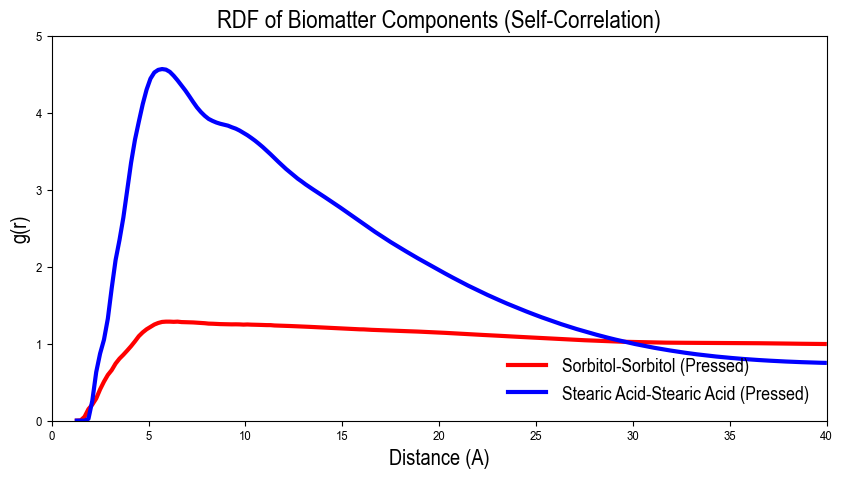

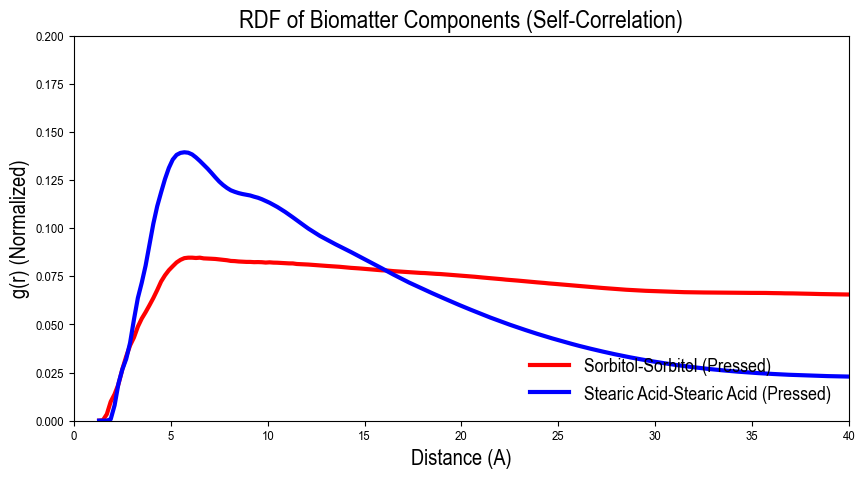

In [7]:
import csv

def read_csv_to_2d_array(file_path):
    data = []
    with open(file_path, newline='') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)  # Skip the header row
        for row in csvreader:
            data.append(row)
    return data

file_path = 'RDF_MDA_sc_sc_fa_fa_pressed.csv'
data = read_csv_to_2d_array(file_path)

r_srb_pressed = []
r_sta_pressed = []
irdf_srb_pressed = []
irdf_sta_pressed = []
irdf_srb_norm_pressed = []
irdf_sta_norm_pressed = []

for data_point in data:
    if float(data_point[1]) != 0: #can't log(0)!
        r_srb_pressed.append(float(data_point[0]))
        r_sta_pressed.append(float(data_point[0]))
        irdf_srb_pressed.append(float(data_point[1]))
        irdf_sta_pressed.append(float(data_point[2]))
        irdf_srb_norm_pressed.append(float(data_point[3]))
        irdf_sta_norm_pressed.append(float(data_point[4]))
        
plt.figure(figsize = (10, 5))
plt.plot(r_srb_pressed, irdf_srb_pressed, label = "Sorbitol-Sorbitol (Pressed)", color = "red", linewidth = 3)
plt.plot(r_sta_pressed, irdf_sta_pressed, label = "Stearic Acid-Stearic Acid (Pressed)", color = "blue", linewidth = 3)
plt.xlim([0,40])
plt.ylim([0,5])
plt.legend(fontsize = 14, loc = 'lower right', frameon = False)
plt.xlabel('Distance (A)', fontsize = 16)
plt.ylabel('g(r)', fontsize = 16)
plt.title('RDF of Biomatter Components (Self-Correlation)', fontsize = 18)
plt.savefig("rdf_sc_sc_fa_fa_mda_pressed_2.svg")
plt.show()

plt.figure(figsize = (10, 5))
plt.plot(r_srb_pressed, irdf_srb_norm_pressed, label = "Sorbitol-Sorbitol (Pressed)", color = "red", linewidth = 3)
plt.plot(r_sta_pressed, irdf_sta_norm_pressed, label = "Stearic Acid-Stearic Acid (Pressed)", color = "blue", linewidth = 3)
plt.xlim([0,40])
plt.ylim([0,0.2])
plt.legend(fontsize = 14, loc = 'lower right', frameon = False)
plt.xlabel('Distance (A)', fontsize = 16)
plt.ylabel('g(r) (Normalized)', fontsize = 16)
plt.title('RDF of Biomatter Components (Self-Correlation)', fontsize = 18)
plt.savefig("rdf_sc_sc_fa_fa_mda_normalized_pressed_2.svg")
plt.show()

C:\Users\dong_\Anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:425: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)
C:\Users\dong_\Anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:425: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)
C:\Users\dong_\Anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:417: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
C:\Users\dong_\Anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:417: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please u

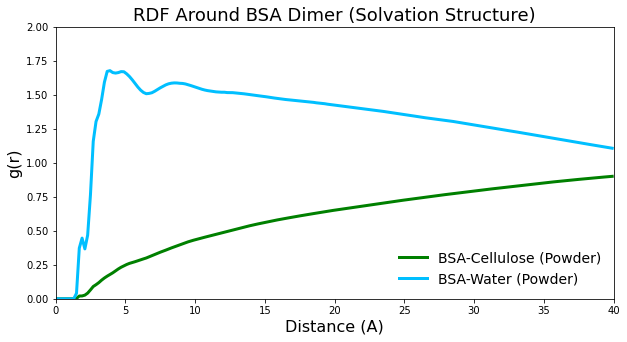

C:\Users\dong_\Anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:417: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
C:\Users\dong_\Anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:417: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)


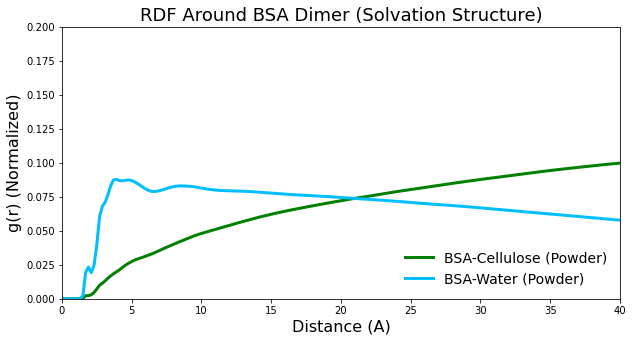

C:\Users\dong_\Anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:417: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
C:\Users\dong_\Anaconda3\lib\site-packages\MDAnalysis\analysis\rdf.py:425: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


In [17]:
from matplotlib import rcParams
rcParams['font.family'] = 'Arial Narrow'

from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import MDAnalysis as mda
from MDAnalysis.analysis import rdf


u = mda.Universe('../../BSA_b-BSA_b-402x_Cellulose6-292x_SRB-186x_STA_powder/md_resnr.gro', '../../BSA_b-BSA_b-402x_Cellulose6-292x_SRB-186x_STA_powder/traj_whole_nojump_mol_comp.xtc')
protein = u.select_atoms('protein')
cellulose = u.select_atoms('resname 0GA 4GA ROH')
water = u.select_atoms('resname SOL')

print('There are {} Protein Residues'.format(len(protein.residues)))
print('There are {} Protein Atoms'.format(len(protein.atoms)))

print('There are {} Cellulose Residues'.format(len(cellulose.residues)))
print('There are {} Cellulose Atoms'.format(len(cellulose.atoms)))

print('There are {} Water Residues'.format(len(water.residues)))
print('There are {} Water Atoms'.format(len(water.atoms)))

irdf_protein_cellulose_powder = rdf.InterRDF(protein, cellulose, nbins=200, range=(0, 40))
irdf_protein_water_powder = rdf.InterRDF(protein, water, nbins=200, range=(0, 40))

irdf_protein_cellulose_powder.run()
irdf_protein_water_powder.run()

rdf_protein_cellulose_norm_powder = preprocessing.normalize([irdf_protein_cellulose_powder.rdf]).reshape((len(irdf_protein_cellulose_powder.rdf),1)).flatten()
rdf_protein_water_norm_powder = preprocessing.normalize([irdf_protein_water_powder.rdf]).reshape((len(irdf_protein_water_powder.rdf),1)).flatten()

plt.figure(figsize = (10, 5))
plt.plot(irdf_protein_cellulose_powder.bins, irdf_protein_cellulose_powder.rdf, label = "BSA-Cellulose (Powder)", color = "green", linewidth = 3)
plt.plot(irdf_protein_water_powder.bins, irdf_protein_water_powder.rdf, label = "BSA-Water (Powder)", color = "deepskyblue", linewidth = 3)
plt.xlim([0,40])
plt.ylim([0,2])
plt.legend(fontsize = 14, loc = 'lower right', frameon = False)
plt.xlabel('Distance (A)', fontsize = 16)
plt.ylabel('g(r)', fontsize = 16)
plt.title('RDF Around BSA Dimer (Solvation Structure)', fontsize = 18)
plt.savefig("rdf_protein_cellulose_water_mda_powder.svg")
plt.show()

plt.figure(figsize = (10, 5))
plt.plot(irdf_protein_cellulose_powder.bins, rdf_protein_cellulose_norm_powder, label = "BSA-Cellulose (Powder)", color = "green", linewidth = 3)
plt.plot(irdf_protein_water_powder.bins, rdf_protein_water_norm_powder, label = "BSA-Water (Powder)", color = "deepskyblue", linewidth = 3)
plt.xlim([0,40])
plt.ylim([0,0.2])
plt.legend(fontsize = 14, loc = 'lower right', frameon = False)
plt.xlabel('Distance (A)', fontsize = 16)
plt.ylabel('g(r) (Normalized)', fontsize = 16)
plt.title('RDF Around BSA Dimer (Solvation Structure)', fontsize = 18)
plt.savefig("rdf_protein_cellulose_water_norm_mda_powder.svg")
plt.show()


import pandas as pd
df = pd.DataFrame({"r (A)":irdf_protein_cellulose_powder.bins,"g(r) Cellulose":irdf_protein_cellulose_powder.rdf,"g(r) Water":irdf_protein_water_powder.rdf,"g(r) (Normalized) Cellulose":rdf_protein_cellulose_norm_powder,"g(r) (Normalized) Water":rdf_protein_water_norm_powder})
df.to_csv("RDF_MDA_protein_cellulose_water_powder.csv", index=False)

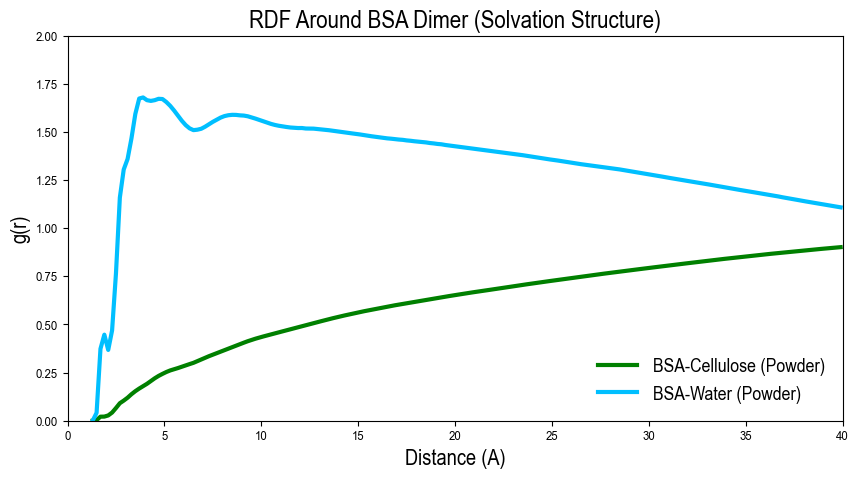

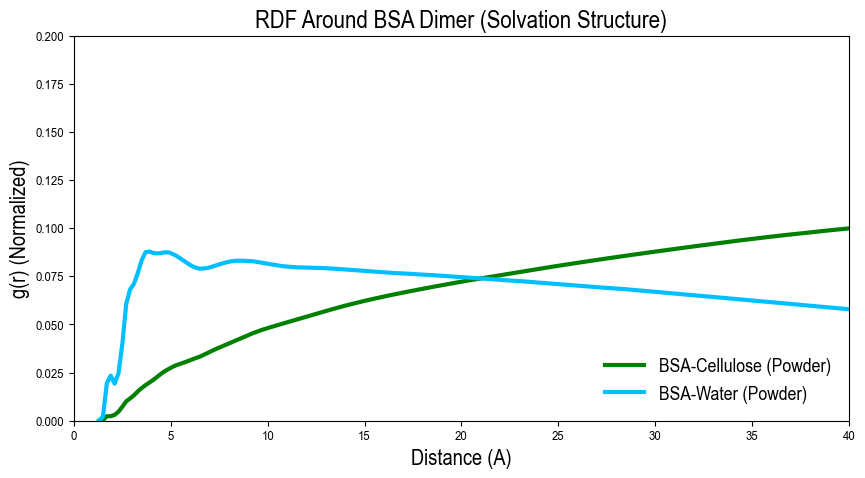

In [9]:
import csv

def read_csv_to_2d_array(file_path):
    data = []
    with open(file_path, newline='') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)  # Skip the header row
        for row in csvreader:
            data.append(row)
    return data

file_path = 'RDF_MDA_protein_cellulose_water_powder.csv'
data = read_csv_to_2d_array(file_path)

r_cellulose_powder = []
r_water_powder = []
irdf_cellulose_powder = []
irdf_water_powder = []
irdf_cellulose_norm_powder = []
irdf_water_norm_powder = []

for data_point in data:
    if float(data_point[1]) != 0: #can't log(0)!
        r_cellulose_powder.append(float(data_point[0]))
        r_water_powder.append(float(data_point[0]))
        irdf_cellulose_powder.append(float(data_point[1]))
        irdf_water_powder.append(float(data_point[2]))
        irdf_cellulose_norm_powder.append(float(data_point[3]))
        irdf_water_norm_powder.append(float(data_point[4]))
        
plt.figure(figsize = (10, 5))
plt.plot(r_cellulose_powder, irdf_cellulose_powder, label = "BSA-Cellulose (Powder)", color = "green", linewidth = 3)
plt.plot(r_water_powder, irdf_water_powder, label = "BSA-Water (Powder)", color = "deepskyblue", linewidth = 3)
plt.xlim([0,40])
plt.ylim([0,2])
plt.legend(fontsize = 14, loc = 'lower right', frameon = False)
plt.xlabel('Distance (A)', fontsize = 16)
plt.ylabel('g(r)', fontsize = 16)
plt.title('RDF Around BSA Dimer (Solvation Structure)', fontsize = 18)
plt.savefig("rdf_protein_cellulose_water_mda_powder_2.svg")
plt.show()

plt.figure(figsize = (10, 5))
plt.plot(r_cellulose_powder, irdf_cellulose_norm_powder, label = "BSA-Cellulose (Powder)", color = "green", linewidth = 3)
plt.plot(r_water_powder, irdf_water_norm_powder, label = "BSA-Water (Powder)", color = "deepskyblue", linewidth = 3)
plt.xlim([0,40])
plt.ylim([0,0.2])
plt.legend(fontsize = 14, loc = 'lower right', frameon = False)
plt.xlabel('Distance (A)', fontsize = 16)
plt.ylabel('g(r) (Normalized)', fontsize = 16)
plt.title('RDF Around BSA Dimer (Solvation Structure)', fontsize = 18)
plt.savefig("rdf_protein_cellulose_water_norm_mda_powder_2.svg")
plt.show()

In [5]:
from matplotlib import rcParams
rcParams['font.family'] = 'Arial Narrow'

from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import MDAnalysis as mda
from MDAnalysis.analysis import rdf


u = mda.Universe('../../BSA_b-BSA_b-402x_Cellulose6-292x_SRB-186x_STA_pressed/md_resnr.gro', '../../BSA_b-BSA_b-402x_Cellulose6-292x_SRB-186x_STA_pressed/traj_whole_nojump_mol_comp.xtc')
protein = u.select_atoms('protein')
cellulose = u.select_atoms('resname 0GA 4GA ROH')
water = u.select_atoms('resname SOL')

print('There are {} Protein Residues'.format(len(protein.residues)))
print('There are {} Protein Atoms'.format(len(protein.atoms)))

print('There are {} Cellulose Residues'.format(len(cellulose.residues)))
print('There are {} Cellulose Atoms'.format(len(cellulose.atoms)))

print('There are {} Water Residues'.format(len(water.residues)))
print('There are {} Water Atoms'.format(len(water.atoms)))

irdf_protein_cellulose_pressed = rdf.InterRDF(protein, cellulose, nbins=200, range=(0, 40))
irdf_protein_water_pressed = rdf.InterRDF(protein, water, nbins=200, range=(0, 40))

irdf_protein_cellulose_pressed.run()
irdf_protein_water_pressed.run()

rdf_protein_cellulose_norm_pressed = preprocessing.normalize([irdf_protein_cellulose_pressed.rdf]).reshape((len(irdf_protein_cellulose_pressed.rdf),1)).flatten()
rdf_protein_water_norm_pressed = preprocessing.normalize([irdf_protein_water_pressed.rdf]).reshape((len(irdf_protein_water_pressed.rdf),1)).flatten()

plt.figure(figsize = (10, 5))
plt.plot(irdf_protein_cellulose_pressed.bins, irdf_protein_cellulose_pressed.rdf, label = "BSA-Cellulose (Pressed)", color = "green", linewidth = 3)
plt.plot(irdf_protein_water_pressed.bins, irdf_protein_water_pressed.rdf, label = "BSA-Water (Pressed)", color = "deepskyblue", linewidth = 3)
plt.xlim([0,40])
plt.ylim([0,2])
plt.legend(fontsize = 14, loc = 'lower right', frameon = False)
plt.xlabel('Distance (A)', fontsize = 16)
plt.ylabel('g(r)', fontsize = 16)
plt.title('RDF Around BSA Dimer (Solvation Structure)', fontsize = 18)
plt.savefig("rdf_protein_cellulose_water_mda_pressed.svg")
plt.show()

plt.figure(figsize = (10, 5))
plt.plot(irdf_protein_cellulose_pressed.bins, rdf_protein_cellulose_norm_pressed, label = "BSA-Cellulose (Pressed)", color = "green", linewidth = 3)
plt.plot(irdf_protein_water_pressed.bins, rdf_protein_water_norm_pressed, label = "BSA-Water (Pressed)", color = "deepskyblue", linewidth = 3)
plt.xlim([0,40])
plt.ylim([0,0.2])
plt.legend(fontsize = 14, loc = 'lower right', frameon = False)
plt.xlabel('Distance (A)', fontsize = 16)
plt.ylabel('g(r) (Normalized)', fontsize = 16)
plt.title('RDF Around BSA Dimer (Solvation Structure)', fontsize = 18)
plt.savefig("rdf_protein_cellulose_water_norm_mda_pressed.svg")
plt.show()


import pandas as pd
df = pd.DataFrame({"r (A)":irdf_protein_cellulose_pressed.bins,"g(r) Cellulose":irdf_protein_cellulose_pressed.rdf,"g(r) Water":irdf_protein_water_pressed.rdf,"g(r) (Normalized) Cellulose":rdf_protein_cellulose_norm_pressed,"g(r) (Normalized) Water":rdf_protein_water_norm_pressed})
df.to_csv("RDF_MDA_protein_cellulose_water_pressed.csv", index=False)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x10cf53040>>
Traceback (most recent call last):
  File "/Users/zido2651/opt/anaconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


KeyboardInterrupt: 

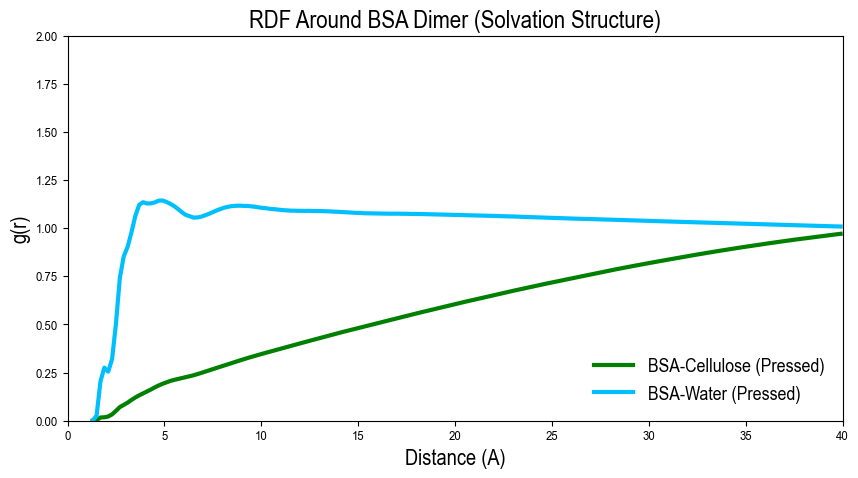

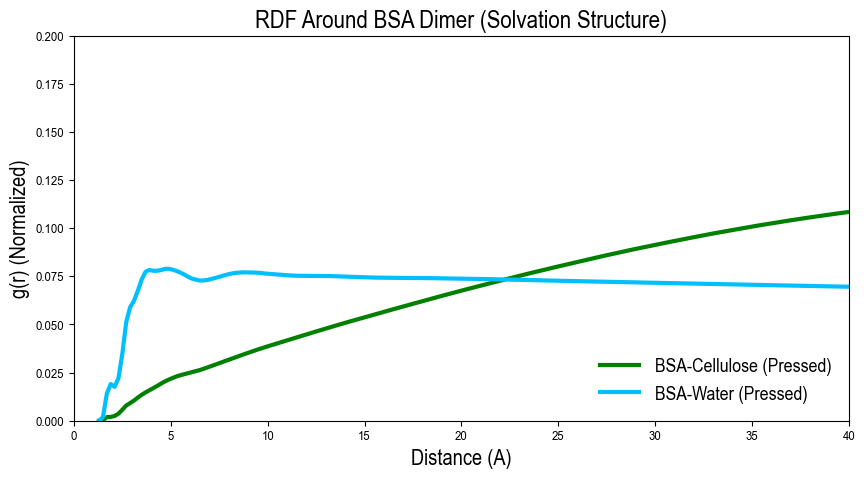

In [4]:
import csv

def read_csv_to_2d_array(file_path):
    data = []
    with open(file_path, newline='') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)  # Skip the header row
        for row in csvreader:
            data.append(row)
    return data

file_path = 'RDF_MDA_protein_cellulose_water_pressed.csv'
data = read_csv_to_2d_array(file_path)

r_cellulose_pressed = []
r_water_pressed = []
irdf_cellulose_pressed = []
irdf_water_pressed = []
irdf_cellulose_norm_pressed = []
irdf_water_norm_pressed = []

for data_point in data:
    if float(data_point[1]) != 0: #can't log(0)!
        r_cellulose_pressed.append(float(data_point[0]))
        r_water_pressed.append(float(data_point[0]))
        irdf_cellulose_pressed.append(float(data_point[1]))
        irdf_water_pressed.append(float(data_point[2]))
        irdf_cellulose_norm_pressed.append(float(data_point[3]))
        irdf_water_norm_pressed.append(float(data_point[4]))
        
plt.figure(figsize = (10, 5))
plt.plot(r_cellulose_pressed, irdf_cellulose_pressed, label = "BSA-Cellulose (Pressed)", color = "green", linewidth = 3)
plt.plot(r_water_pressed, irdf_water_pressed, label = "BSA-Water (Pressed)", color = "deepskyblue", linewidth = 3)
plt.xlim([0,40])
plt.ylim([0,2])
plt.legend(fontsize = 14, loc = 'lower right', frameon = False)
plt.xlabel('Distance (A)', fontsize = 16)
plt.ylabel('g(r)', fontsize = 16)
plt.title('RDF Around BSA Dimer (Solvation Structure)', fontsize = 18)
plt.savefig("rdf_protein_cellulose_water_mda_pressed_2.svg")
plt.show()

plt.figure(figsize = (10, 5))
plt.plot(r_cellulose_pressed, irdf_cellulose_norm_pressed, label = "BSA-Cellulose (Pressed)", color = "green", linewidth = 3)
plt.plot(r_water_pressed, irdf_water_norm_pressed, label = "BSA-Water (Pressed)", color = "deepskyblue", linewidth = 3)
plt.xlim([0,40])
plt.ylim([0,0.2])
plt.legend(fontsize = 14, loc = 'lower right', frameon = False)
plt.xlabel('Distance (A)', fontsize = 16)
plt.ylabel('g(r) (Normalized)', fontsize = 16)
plt.title('RDF Around BSA Dimer (Solvation Structure)', fontsize = 18)
plt.savefig("rdf_protein_cellulose_water_norm_mda_pressed_2.svg")
plt.show()

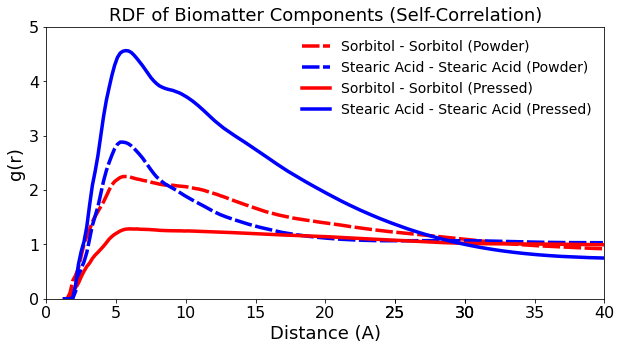

In [29]:
from matplotlib import rcParams
rcParams['font.family'] = 'Arial Narrow'

from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import MDAnalysis as mda
from MDAnalysis.analysis import rdf
import csv

def read_csv_to_2d_array(file_path):
    data = []
    with open(file_path, newline='') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)  # Skip the header row
        for row in csvreader:
            data.append(row)
    return data

file_path = 'RDF_MDA_sc_sc_fa_fa_powder.csv'
data = read_csv_to_2d_array(file_path)

r_srb_powder = []
r_sta_powder = []
irdf_srb_powder = []
irdf_sta_powder = []
irdf_srb_norm_powder = []
irdf_sta_norm_powder = []

for data_point in data:
    if float(data_point[1]) != 0: #can't log(0)!
        r_srb_powder.append(float(data_point[0]))
        r_sta_powder.append(float(data_point[0]))
        irdf_srb_powder.append(float(data_point[1]))
        irdf_sta_powder.append(float(data_point[2]))
        irdf_srb_norm_powder.append(float(data_point[3]))
        irdf_sta_norm_powder.append(float(data_point[4]))

file_path = 'RDF_MDA_sc_sc_fa_fa_pressed.csv'
data = read_csv_to_2d_array(file_path)

r_srb_pressed = []
r_sta_pressed = []
irdf_srb_pressed = []
irdf_sta_pressed = []
irdf_srb_norm_pressed = []
irdf_sta_norm_pressed = []

for data_point in data:
    if float(data_point[1]) != 0: #can't log(0)!
        r_srb_pressed.append(float(data_point[0]))
        r_sta_pressed.append(float(data_point[0]))
        irdf_srb_pressed.append(float(data_point[1]))
        irdf_sta_pressed.append(float(data_point[2]))
        irdf_srb_norm_pressed.append(float(data_point[3]))
        irdf_sta_norm_pressed.append(float(data_point[4]))
        
        
plt.figure(figsize = (10, 5))
plt.plot(r_srb_powder, irdf_srb_powder, label = "Sorbitol - Sorbitol (Powder)", color = "red", linewidth = 3.5, linestyle = (0, (5, 1)))
plt.plot(r_sta_powder, irdf_sta_powder, label = "Stearic Acid - Stearic Acid (Powder)", color = "blue", linewidth = 3.5, linestyle = (0, (5, 1)))
plt.plot(r_srb_pressed, irdf_srb_pressed, label = "Sorbitol - Sorbitol (Pressed)", color = "red", linewidth = 3.5)
plt.plot(r_sta_pressed, irdf_sta_pressed, label = "Stearic Acid - Stearic Acid (Pressed)", color = "blue", linewidth = 3.5)
plt.xlim([0,40])
plt.ylim([0,5])
plt.xticks([0,5,10,15,20,25,30,25,30,35,40], fontsize = 16)
plt.yticks([0,1,2,3,4,5], fontsize = 16)
plt.legend(fontsize = 14, loc = 'upper right', frameon = False)
plt.xlabel('Distance (A)', fontsize = 18)
plt.ylabel('g(r)', fontsize = 18)
plt.title('RDF of Biomatter Components (Self-Correlation)', fontsize = 18)
plt.savefig("rdf_sc_sc_fa_fa_mda_powder_pressed_comparson.svg")
plt.show()